In [43]:
# Import librarys
'''
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn import metrics
'''

'\nfrom sklearn.datasets import make_blobs\nfrom sklearn.preprocessing import StandardScaler\nimport matplotlib.pyplot as plt\nfrom sklearn.cluster import DBSCAN\nimport numpy as np\nfrom sklearn import metrics\n'

In [49]:
# Import librarys
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic clusters (Increasing the value of cluster_std will increase the standard deviation of each cluster)
X, y = make_blobs(n_samples=3000,centers=4,cluster_std=[1.1, 1.1, 1.1, 1.1], random_state=42)

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

print(f'Shape of the X: {X.shape}',end=' | ')
print(f'Shape of the Y: {y.shape}')
print('---------------------')
print(f'max , min of the unstandardized data: [{np.min(X, axis=0)},{np.max(X, axis=0)}]')
print(f'max , min of the standardized data: [{np.min(X_standardized, axis=0)},{np.max(X_standardized, axis=0)}]')

Shape of the X: (3000, 2) | Shape of the Y: (3000,)
---------------------
max , min of the unstandardized data: [[-11.95466108 -10.02019892],[ 7.8838827  13.25229077]]
max , min of the standardized data: [[-1.6136375  -2.03801471],[2.13087941 1.64496063]]


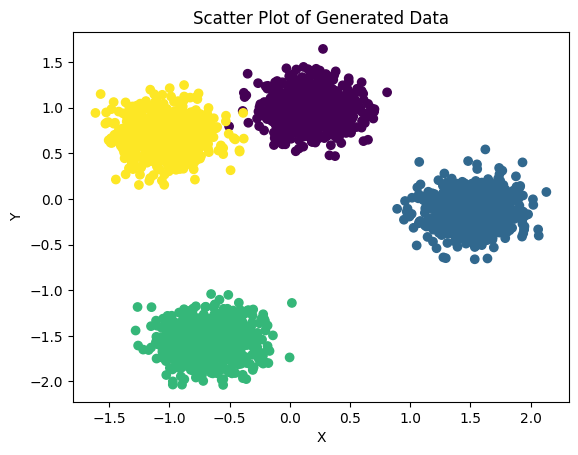

In [48]:
# Import librarys
import matplotlib.pyplot as plt

# Scatter plot of the generated data
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Generated Data')
plt.show()

In [50]:
# Import librarys
from sklearn.cluster import DBSCAN

# Create DBSCAN object
dbscan = DBSCAN(eps=0.3, min_samples=500)

# Fit the DBSCAN model to the standardized data
dbscan.fit(X_standardized)

DBSCAN(eps=0.3, min_samples=500)

In [52]:
# Get the predicted cluster labels
labels = dbscan.labels_

# Print the cluster labels
print("Cluster labels:", labels)

# Access the resulting cluster labels
labels = dbscan.labels_

# Calculate the estimated number of clusters
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Calculate the number of noise points
num_noise_points = np.sum(labels == -1)

# Print the results
print("Estimated number of clusters:", num_clusters)
print("Number of noise points:", num_noise_points)

Cluster labels: [1 0 0 ... 1 3 3]
Estimated number of clusters: 4
Number of noise points: 365


In [54]:
# Import librarys
from sklearn import metrics

# Evaluate clustering performance
homogeneity = metrics.homogeneity_score(y, labels)
completeness = metrics.completeness_score(y, labels)
v_measure = metrics.v_measure_score(y, labels)
adjusted_rand_index = metrics.adjusted_rand_score(y, labels)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(y, labels)
silhouette_coefficient = metrics.silhouette_score(X_standardized, labels)

# Print the evaluation results
print(f"Homogeneity Score: {homogeneity}")
print(f"Completeness Score: {completeness}")
print(f"V-measure Score: {v_measure}")
print(f"Adjusted Rand Index: {adjusted_rand_index}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info}")
print(f"Silhouette Coefficient: {silhouette_coefficient}")

Homogeneity Score: 0.8806953207969198
Completeness Score: 0.7691371822002224
V-measure Score: 0.8211445903558334
Adjusted Rand Index: 0.8192848872301047
Adjusted Mutual Information: 0.8209032514694189
Silhouette Coefficient: 0.6146271195391831
